In [198]:
import pandas as pd
import numpy as np

In [199]:
# vectorisation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# import de NLK
#import nltk

#import train_split
from  sklearn.model_selection import train_test_split

In [200]:
from keras.backend import clear_session
from keras.preprocessing.text import Tokenizer


In [210]:
data = pd.read_csv('text_emotion.csv')

In [211]:
data.shape

(40000, 4)

In [212]:
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [215]:
#df['string_col'].str.replace(regular_expression, '', regex=True)
regular_expression = r'@\w+'
data['content'] = data['content'].str.replace(regular_expression, '', regex=True)

In [216]:
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...


In [217]:
#préparation du data set 2 pour la fusion
datalove = data[data.sentiment=="love"].iloc[:,:]
datasadness = data[data.sentiment=="sadness"].iloc[:,:]
datasurprise = data[data.sentiment=="surprise"].iloc[:,:]
datahappiness = data[data.sentiment=="happiness"].iloc[:,:]
dataanger = data[data.sentiment=="anger"].iloc[:,:]
dataworry = data[data.sentiment=="worry"].iloc[:,:]

In [218]:
dataNew = pd.concat([datalove,datasadness,datasurprise,datahappiness,dataanger,dataworry])
dataNew.shape

(24972, 4)

In [219]:
dataNew["sentiment"] = dataNew["sentiment"].astype('category').cat.codes 

# Préparation des données
# preparation des targets
corpus = np.array(dataNew["content"])
targets = np.array(dataNew["sentiment"])

#la liste des émotions
listEmotion = dataNew["sentiment"].unique()
listEmotion

array([2, 3, 4, 1, 0, 5], dtype=int8)

In [220]:
# import de NLK
import nltk
stop_words = nltk.corpus.stopwords.words("english")

# Vobabulary analysis
cv = CountVectorizer(stop_words = stop_words)
X = cv.fit_transform(corpus)
words = cv.get_feature_names()

print(X.shape)
print("vocabulary size; %d" % len(words) )

(24972, 23366)
vocabulary size; 23366


In [221]:
input_dim = X.shape[1]  # Number of features
input_dim 

23366

In [222]:
tokenizer = Tokenizer(num_words=input_dim )

sentences_train, sentences_test, y_train, y_test = train_test_split(corpus,targets, test_size =0.2, random_state=42)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1 


print(sentences_train[2])
print(X_train[2])

bummer, my phone gets disconnected. on the weekend of my birthday. darn &lt;/3
[1033, 5, 204, 516, 4449, 15, 3, 135, 12, 5, 259, 1090, 147, 111]


In [233]:
clear_session()

In [224]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [225]:
print(X_train[0, :])

[  26   77  157   15    4  250 1261    9   27   53  224   26   29  790
    5  135    9   14 1557    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [234]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1062650   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 26)                130026    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 162       
Total params: 1,192,838
Trainable params: 1,192,838
Non-trainable params: 0
_________________________________________________________________


In [235]:
#clear_session()
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))



625/625 [==============================] - 13s 20ms/step - loss: 0.7153 - accuracy: 0.7934
Training Accuracy: 0.7934
157/157 [==============================] - 2s 15ms/step - loss: 1.3525 - accuracy: 0.4472
Testing Accuracy:  0.4472


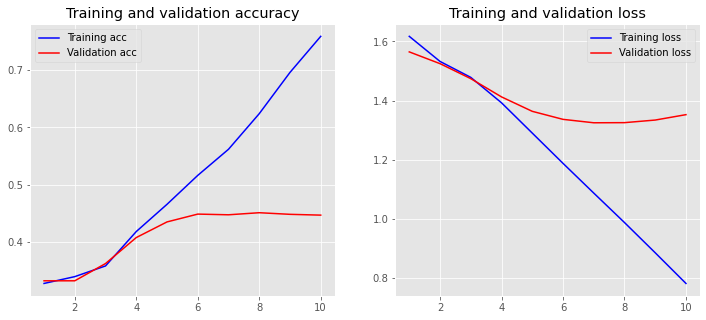

In [236]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [237]:
clear_session()
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2125300   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 26)                3354      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 162       
Total params: 2,192,944
Trainable params: 2,192,944
Non-trainable params: 0
_________________________________________________________________


In [240]:
clear_session()
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode="max",)

history = model.fit(X_train, y_train,
                        epochs=25,
                        verbose=1,
                        validation_data=(X_test, y_test),
                        batch_size=1000,
                        callbacks=[callback])

Epoch 1/25
20/20 [==============================] - 18s 884ms/step - loss: 1.6186 - accuracy: 0.3402 - val_loss: 1.5662 - val_accuracy: 0.3329
Epoch 2/25
20/20 [==============================] - 17s 873ms/step - loss: 1.5113 - accuracy: 0.3435 - val_loss: 1.4787 - val_accuracy: 0.3536
Epoch 3/25
20/20 [==============================] - 18s 885ms/step - loss: 1.3807 - accuracy: 0.4247 - val_loss: 1.3489 - val_accuracy: 0.4567
Epoch 4/25
20/20 [==============================] - 19s 932ms/step - loss: 1.2271 - accuracy: 0.4962 - val_loss: 1.3038 - val_accuracy: 0.4707
Epoch 5/25
20/20 [==============================] - 17s 849ms/step - loss: 1.1088 - accuracy: 0.5416 - val_loss: 1.3125 - val_accuracy: 0.4733
Epoch 6/25
20/20 [==============================] - 17s 867ms/step - loss: 0.9929 - accuracy: 0.6047 - val_loss: 1.3545 - val_accuracy: 0.4665


625/625 [==============================] - 11s 18ms/step - loss: 0.8984 - accuracy: 0.6543
Training Accuracy: 0.6543
157/157 [==============================] - 3s 18ms/step - loss: 1.3545 - accuracy: 0.4665
Testing Accuracy:  0.4665


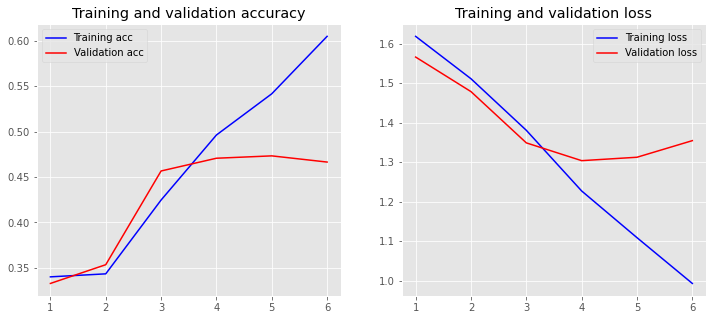

In [241]:


loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2125300   
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 126       
Total params: 2,137,546
Trainable params: 2,137,546
Non-trainable params: 0
______________________________________________

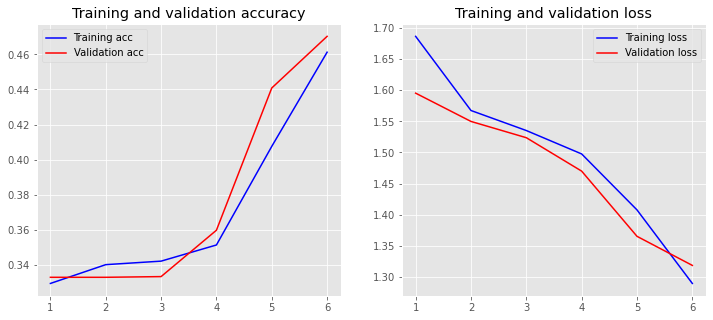

In [249]:

clear_session()
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

###########
clear_session()
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000,
                    callbacks=[callback])
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)
